In [1]:
%matplotlib inline
import Euclid
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from astropy.table import Table
from astropy import units as u
from astropy.units import photometric

In [2]:
plt.rcParams['figure.figsize'] = (20, 10)

## Setup environment

In [3]:
%elogin

In [4]:
%erun Phosphoros

In [5]:
from PhzCLI.PlotSpecZComparison import SpeczPhotozPlot, displayHistogram, compute_stats

## Read the join catalog PHZ+MER+TU

In [26]:
t = Table.read('/home/aalvarez/Work/Data/SC7/PerPipeline/PS_DEV_PHZProduction_20200310-VALIDATION-nmorisse-PLAN-0001-2020-04-24-21-48-02-12/RUN_with_LSST_TU.fits')

In [27]:
len(t)

59417

## Filter out objects with SNR <= 10

In [28]:
snr = t['FLUX_VIS_APER'] / t['FLUXERR_VIS_APER'] > 10

In [29]:
t = t[snr]

In [30]:
len(t)

18950

## Compute Magnitude AB

In [31]:
t['MAG_VIS_AB'] = t['FLUX_VIS_APER'].to(u.mag(photometric.AB))

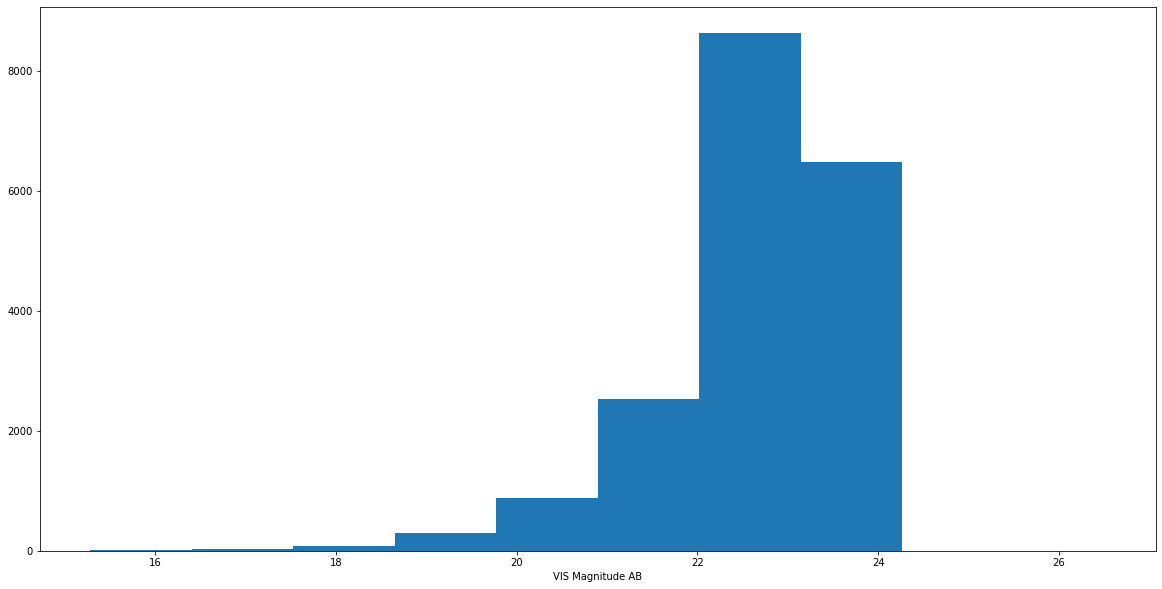

In [32]:
plt.figure()
plt.hist(t['MAG_VIS_AB'])
plt.xlabel('VIS Magnitude AB')
plt.show()

## Apply cut

In [44]:
mag_vis = t['MAG_VIS_AB'] > 17

In [45]:
t = t[mag_vis]
len(t)

17286

## Compute statistics

In [46]:
data, mean, median, sigma, mad, outliersPercent,sigmaNoOutliers, meanNoOutliers = compute_stats(t['Z_OBS'], t['REDSHIFT_MEDIAN'])

/home/aalvarez/miniconda3/envs/phz/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


--> Mean                :  -0.04231783544577259
--> Median              :  -0.027342017740011215
--> Sigma               :  0.22224409359563702
--> Mad                 :  0.06572917848825455
--> Outliers            :  25.662385745690155 %
--> Sigma (no outliers) :  0.039058574


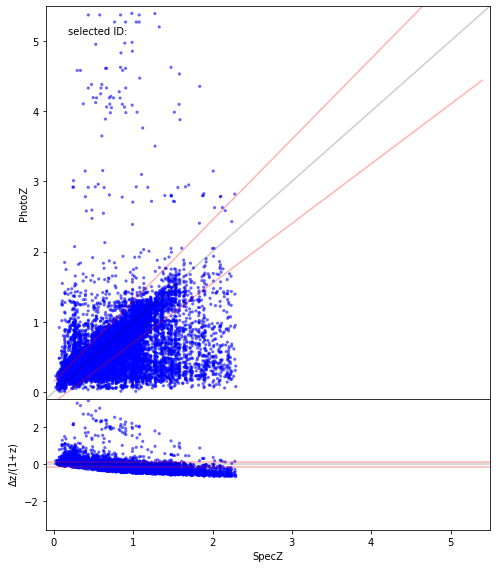

In [47]:
SpeczPhotozPlot(t['OBJECT_ID'], t['Z_OBS'], t['REDSHIFT_MEDIAN'], data)

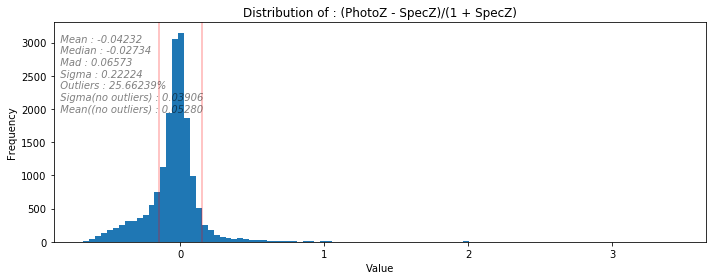

In [48]:
_ = displayHistogram(data, mean, median, mad, sigma, outliersPercent, sigmaNoOutliers, meanNoOutliers)

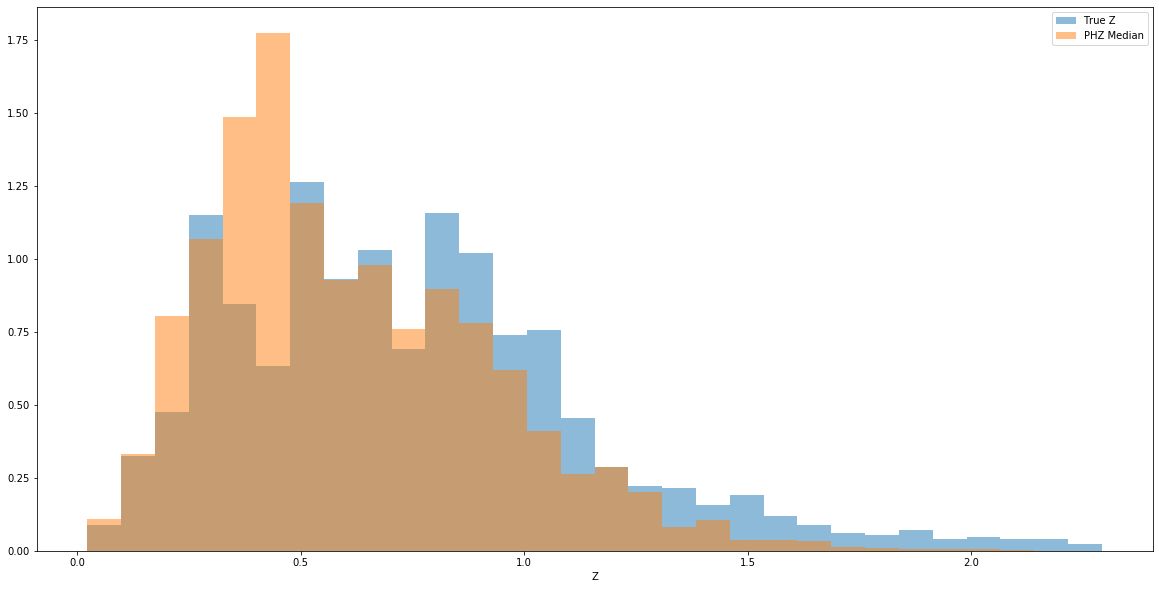

In [49]:
plt.figure()
bins = plt.hist(t['Z_OBS'], bins=30, alpha=0.5, density=True, label='True Z')
plt.hist(t['REDSHIFT_MEDIAN'], bins=bins[1], alpha=0.5, density=True, label='PHZ Median')
plt.xlabel('Z')
plt.legend()
plt.show()

## Box plot

In [50]:
edges = np.histogram_bin_edges(t['MAG_VIS_AB'], bins=10)
centers = (edges[1:] + edges[:-1])/2
bins = np.digitize(t['MAG_VIS_AB'], bins=edges)

In [51]:
err = t['REDSHIFT_MEDIAN'] - t['Z_OBS']
median_err = []
q1_err = []
q3_err = []
data = []
for b in np.arange(1, 1+len(centers)):
    data.append(err[bins==b])
    q1, m, q3 = np.quantile(err[bins==b], [0.25, 0.5, 0.75])
    q1_err.append(q1)
    median_err.append(m)
    q3_err.append(q3)
q1_err = np.array(q1_err)
median_err = np.array(median_err)
q3_err = np.array(q3_err)

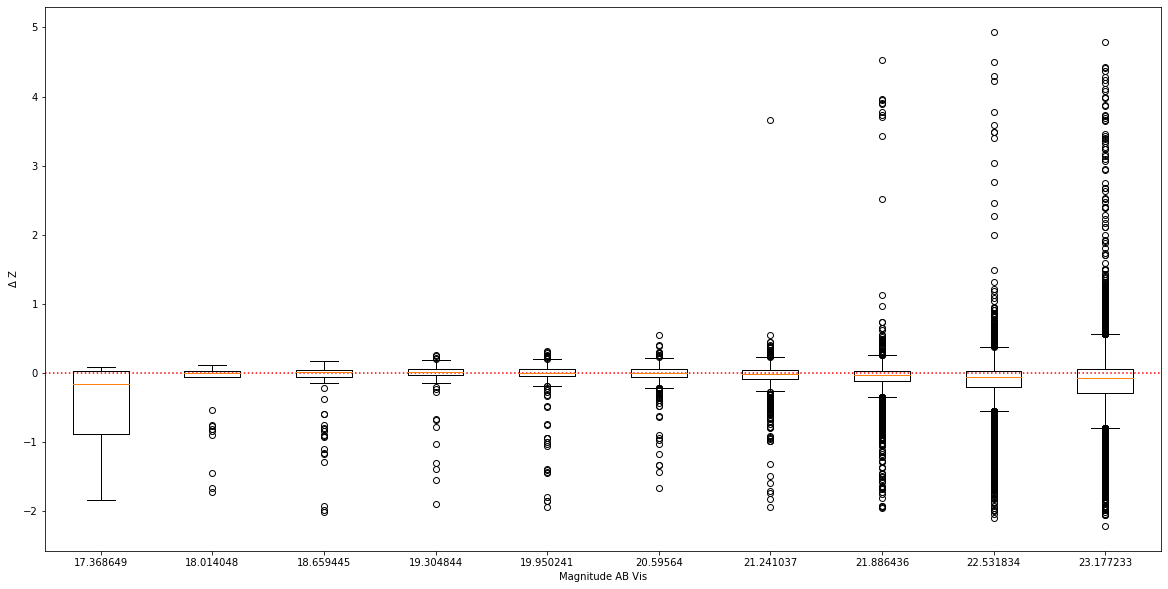

In [52]:
plt.figure(figsize=(20,10))
plt.boxplot(data, labels=centers)
plt.hlines(0, 0.5, 10.5, linestyle=':', color='r')
plt.xlabel('Magnitude AB Vis')
plt.ylabel('$\Delta$ Z')
plt.show()